In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import richardsplot as rplot
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [16]:
df = pd.read_csv("RQQfigs.csv")
df.head()

,Name,Maj,Min,S1p4_FIRST,S1p4_err,A_morph,C_morph,Flux,FluxErr,PFimfit,...,logL,i,I_2a,MI_Z2,LOGL2500,R,LD_cm,Kell_Ratio,logL6GHz [W/Hz],MJD_dr7
0,0808+4407,472.0,237.0,NaN,NaN,U,U,36.3,8.300000,36.3,...,22.12,17.615,-22.58,-23.605438,29.601365,0.19,4.389983e+27,0.6,21.901570,NaN
1,0816+4258,153.0,105.0,NaN,NaN,SR,U,199.0,14.000000,178.5,...,22.54,16.636,-23.21,-23.978752,29.750691,0.29,3.651811e+27,0.9,22.485202,NaN
2,0822+4553,150.0,89.0,427,127.0,M,U,531.0,33.015148,425.0,...,22.77,17.695,-22.69,-23.688601,29.634631,0.73,4.852865e+27,2.4,23.151097,51868.0
3,0834+3826,238.0,39.0,NaN,NaN,U,U,116.8,7.100000,116.8,...,22.49,17.527,-22.77,-23.800290,29.679306,0.36,4.629499e+27,0.9,22.453822,NaN
4,0843+5357,838.0,168.0,516,150.0,E,U,349.0,31.000000,122.8,...,22.72,16.440,-23.25,-23.912282,29.724103,0.43,3.371040e+27,0.9,22.661519,NaN


In [17]:
df.columns

Index(['Name', 'Maj', 'Min', 'S1p4_FIRST', 'S1p4_err', 'A_morph', 'C_morph',
       'Flux', 'FluxErr', 'PFimfit', 'PFerrimfit', 'S6_core (uJy)',
       'S6_core_err (uJy)', 'Sa/Sc', 'SB', 'VLBA', 'z', 'L6_NVSS',
       'L6_NVSS_alpha0', 'DATE_NVSS', 'L6_FIRST', 'L6_FIRST_alpha0',
       'DATE_FIRST', 'L6_VLASS', 'L6_VLASS_alpha0', 'DATE_VLASS', 'DATE_VLAA',
       'DATE_VLAC', 'SDSSName', 'S(6)_t', 'pmt', 'RAobs_1', 'RAoff',
       'DECobs_1', 'DECoff', 'sz_maj', 'szmajerr', 'sz_min', 'szminerr', 'PA',
       'PAerr', 'IFimfit', 'IFerrimfit', 'IFimfitSF', 'IFerrimfitSF',
       'PFimfitSF', 'PFerrimfitSF', 'Detection', 'Freq.', 'RO_Offset', 'RMS',
       'PF', 'PF_err', 'IF', 'IF_err', 'S/N', 'Resolved', 'SelfCal', 'Flags',
       'RAobs_Kell', 'Decobs_Kell', 'delta', 'S(6)_p', 'pmp', 'f_c', 'logL',
       'i', 'I_2a', 'MI_Z2', 'LOGL2500', 'R', 'LD_cm', 'Kell_Ratio',
       'logL6GHz [W/Hz]', 'MJD_dr7'],
      dtype='object')

In [19]:
Score = df[["S6_core (uJy)"]].values.flatten()
Stot  = df[["Flux"]].values.flatten()
ratio = (Score/Stot)[(Stot/Score)!=1.]

In [20]:
np.mean(ratio)

0.6501542750334668

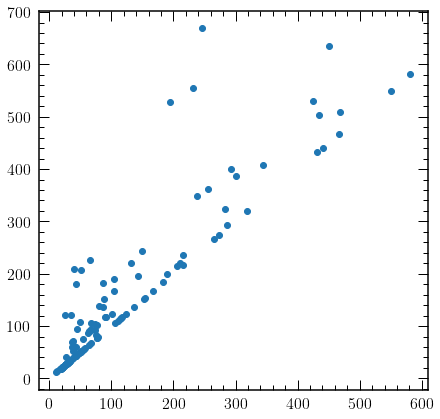

In [22]:
plt.scatter(Score, Stot)

In [23]:
np.mean(ratio)

0.6501542750334668

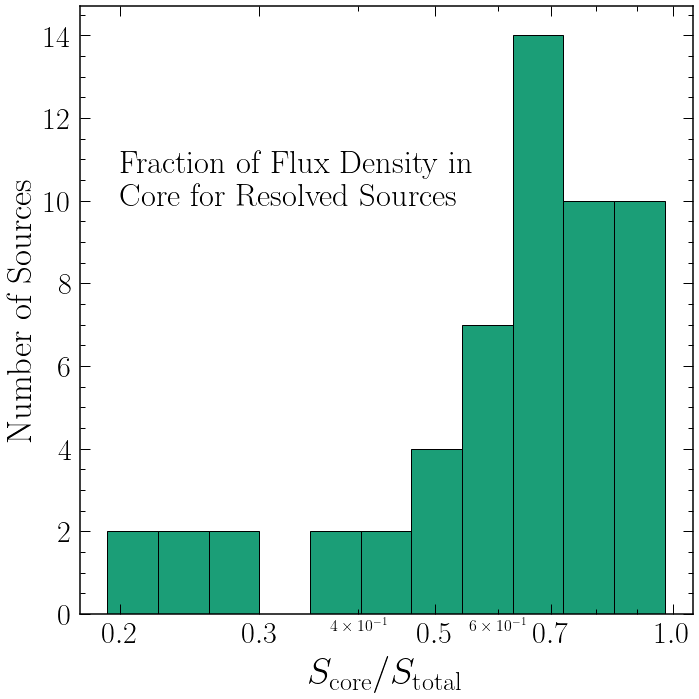

In [28]:
fig = plt.figure(figsize=(10,10))
fig.text(0.18, 0.7, "Fraction of Flux Density in \nCore for Resolved Sources",
        fontsize=32.5)

bins = np.logspace(np.log10(np.min(ratio)), np.log10(np.max(ratio)), 12)

plt.hist(ratio, color=rplot.csdark[0], edgecolor="k", bins=bins)

plt.xscale("log")
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel("$S_\mathrm{core}/S_\mathrm{total}$", fontsize=37.5)
plt.ylabel("Number of Sources", fontsize=35)
plt.gca().set_xticks([0.2, 0.3, 0.5, 0.7, 1])
plt.tight_layout()
plt.savefig("PaperPlots/Score_over_Stot.pdf")
plt.show()